# Titanic Survival Prediction
Author: Georg Brandmayr

This notebook implements the prediction of titanic survivors. A training dataset `train.csv` with 918 passengers including survival status is used to learn a prediction function. A test set `test.csv` contains 418 passengers and will be used to predict their survival.

Your results must be reproducible - please **don't overlook the rules for `random_state`** in the body of this notebook to obtain full credit for your .

In [1]:
import pandas as pd
print('pandas', pd.__version__)
import numpy as np
print('numpy', np.__version__)
import seaborn as sns
from pathlib import Path


pandas 2.0.3
numpy 1.24.3


## Obtain and explore

In [2]:
data_path = Path.cwd()

df = pd.read_csv(data_path/'train.csv', index_col=0)
df[:3]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


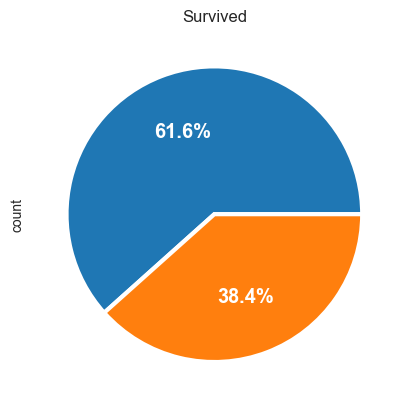

In [3]:
df.Survived.value_counts().plot.pie(autopct='%.1f%%', 
                                    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, 
                                    textprops=dict(size='x-large', color='white', fontweight='bold')).set_title('Survived');

In [4]:
df.groupby(['Pclass']).Survived.agg(Survivor_ratio='mean', Passengers='size')

,Survivor_ratio,Passengers
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


In [ ]:
#df.set_index('Survived', append=True)['Age'].unstack().boxplot()
sns.boxplot(df, x='Survived', y='Age');

## Model on prior probability


In [5]:
import sklearn
print('sklearn', sklearn.__version__)
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold


sklearn 1.3.0


In [6]:
# a pessimist can never be disappointed
class Pessimist(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.fit(None, None)
    def fit(self, X, y):
        return self
    def predict(self, X):
        return np.zeros(len(X,), dtype='int8')
    
model = Pessimist()
model

Pessimist()

In [8]:
y_train = df['Survived']
X_train = df[df.columns[1:]]

yh = model.predict(X_train)

score = accuracy_score(y_train, yh)
score

0.6161616161616161

## Test model
The test targets are not available. To obtain the test score the predictions on the `test data` must be submitted.

In [9]:
# load the test data
X_test = pd.read_csv(data_path/'test.csv', index_col=0)
X_test

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [13]:
yh = model.predict(X_test)
yh = pd.Series(yh, X_test.index, name='Survived')

Save the result as CSV for submission.

In [14]:
yh.to_csv(data_path/'submission_test.csv')

After submitting `test_submission.csv` online the test score was published under our ID. It is 0.622.

In [15]:
scores = pd.DataFrame(dict(train=score, 
                          test=0.622), 
                     index=['Pessimist'])
scores

,train,test
Pessimist,0.616162,0.622


Nice, the test score fits well to the training result. 

## Model on data
Result must be reproducible, i.e., multiple runs must result in the same result.

All `random_state` parameters (for models, data splitting, etc.) must be fixed - for reproducibility - based on your **random ID in `RandomID.csv`**. 

In [16]:
random_id = 17 #ai23m017 - 17 is the id
# a RandomState object or the id may be used, choose a variant
random_state = np.random.RandomState(random_id)
random_state = random_id
#random_state = None

Let's create another model, based on the data.

In [17]:
features = ['Pclass']#, 'Age']

In [18]:
y_train = df['Survived']
X_train = df[features]
X_train

,Pclass
PassengerId,
1,3
2,1
3,3
4,1
5,3
...,...
887,2
888,1
889,3


In [19]:
model = DecisionTreeClassifier(random_state=random_state)
model

DecisionTreeClassifier(random_state=17)

Let's train the model. We evaluate it on the train set to assess overfitting.

In [20]:
model.fit(X_train, y_train)
score = accuracy_score(y_train, model.predict(X_train))
scores.loc['DT', 'train'] = score
score

0.6790123456790124

Cross validation can be used as a proxy for test performance

In [21]:
cv = 7
s = cross_val_score(model, X_train, y_train, cv=cv)
m = s.mean()
sd = s.std()
scores.loc['DT', 'cv'] = m
# assume a Gaussian dist.
l = m - 1.96*sd/(len(s)**.5)
u = m + 1.96*sd/(len(s)**.5)
print(f'CV score = {m:.3f}±{sd:.3f}, 95% CI [{l:.3f}, {u:.3f}], folds:', s,)
#model.fit(X_train, y_train)
scores


CV score = 0.667±0.055, 95% CI [0.626, 0.707], folds: [0.5859375  0.59375    0.67716535 0.65354331 0.7007874  0.73228346
 0.72440945]


,train,test,cv
Pessimist,0.616162,0.622,NaN
DT,0.679012,NaN,0.666839


For comparison:

In [22]:
scores.loc['Pessimist', 'cv'] = cross_val_score(Pessimist(), X_train, y_train, cv=cv).mean()
scores

,train,test,cv
Pessimist,0.616162,0.622,0.616159
DT,0.679012,NaN,0.666839


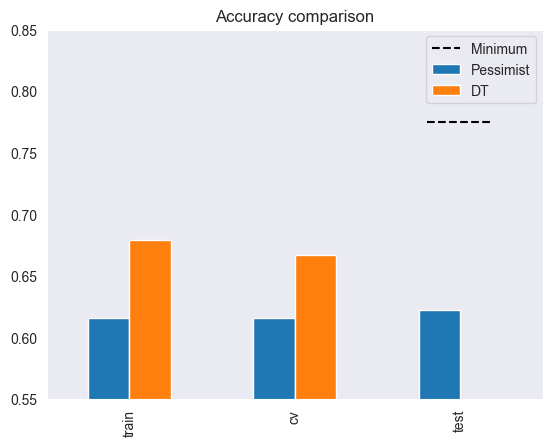

In [23]:
ax = scores[['train', 'cv', 'test']].T.plot.bar()
ax.grid()
x, dx = 2, .2
ax.hlines(y=0.775, xmin=x - dx, xmax=x + dx, linestyle='--', color='k')
ax.set_ylim([.55, 0.85])
ax.set_title('Accuracy comparison');
ax.legend(['Minimum', *scores.index],);# loc='lower right')

The data based model improved in cross validation and no extreme overfitting occurs on the train set. 

How will it perform on the test set? 

In [ ]:
yh = model.predict(X_test[features])
yh = pd.Series(yh, X_test.index, name='Survived')
# save submission
yh.to_csv(data_path/'submission_test.csv') 

Ready to submit the predictions! Upload submission.